<a href="https://colab.research.google.com/github/lavlesh20214262671/project2_practice/blob/feature/AppsForBharat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('store_sku_ba_dataset.csv')
df

,Store ID,SKU ID,Total Visits,Transactions,Revenue
0,Store_1,SKU_1,606,573,74688.67
1,Store_1,SKU_2,695,27,1390.60
2,Store_1,SKU_3,389,285,50679.63
3,Store_1,SKU_4,689,505,16764.34
4,Store_1,SKU_5,522,230,41928.40
...,...,...,...,...,...
995,Store_50,SKU_16,704,40,7557.12
996,Store_50,SKU_17,846,104,13813.85
997,Store_50,SKU_18,868,842,104198.81
998,Store_50,SKU_19,959,209,7604.58


Data Cleaning and Preparation

In [3]:

print(df.head())
print(df.info())

print(df.isnull().sum())

df['Conversion_Rate'] = df['Transactions'] / df['Total Visits']

  Store ID SKU ID  Total Visits  Transactions   Revenue
0  Store_1  SKU_1           606           573  74688.67
1  Store_1  SKU_2           695            27   1390.60
2  Store_1  SKU_3           389           285  50679.63
3  Store_1  SKU_4           689           505  16764.34
4  Store_1  SKU_5           522           230  41928.40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store ID      1000 non-null   object 
 1   SKU ID        1000 non-null   object 
 2   Total Visits  1000 non-null   int64  
 3   Transactions  1000 non-null   int64  
 4   Revenue       1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
None
Store ID        0
SKU ID          0
Total Visits    0
Transactions    0
Revenue         0
dtype: int64


Store-Level Analysis

Top 5 Performing Stores:
    Store ID  Total Visits  Transactions    Revenue  Store_Conversion_Rate
32  Store_39          9213          6124  667804.09               0.664713
43  Store_49         11032          7129  793523.76               0.646211
38  Store_44          8482          5356  467371.06               0.631455
30  Store_37          9458          5937  404139.26               0.627723
41  Store_47          9753          6081  521435.76               0.623500

Bottom 5 Performing Stores:
    Store ID  Total Visits  Transactions    Revenue  Store_Conversion_Rate
3   Store_12          8698          3310  313714.85               0.380547
23  Store_30         10659          4043  388411.83               0.379304
29  Store_36         10149          3819  431669.84               0.376293
5   Store_14         12804          4674  421539.55               0.365042
6   Store_15          8922          3090  362021.48               0.346335


<ipython-input-5-2d87cfadc5e6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store ID', y='Store_Conversion_Rate',


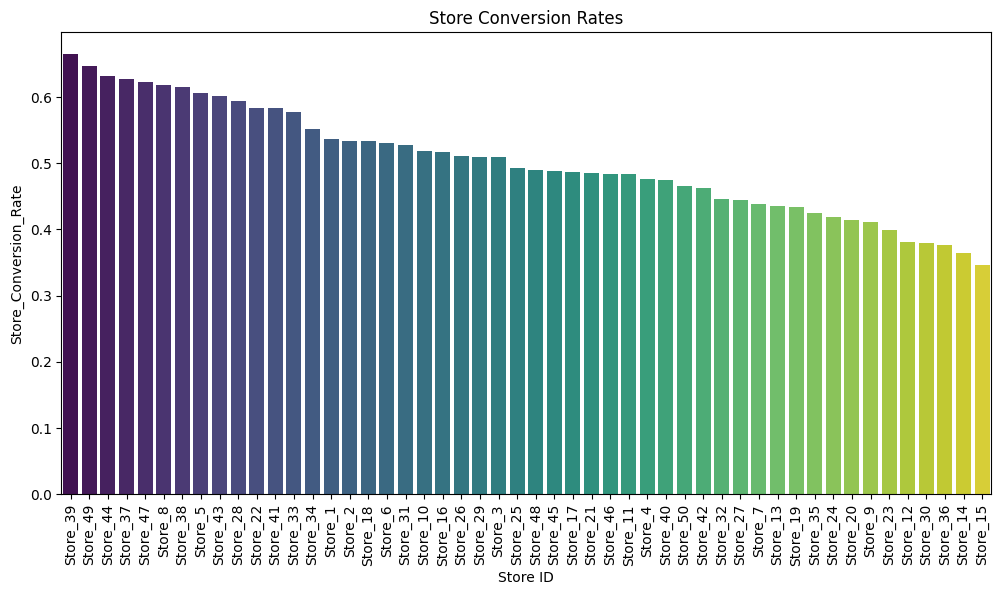

In [5]:

store_level = df.groupby('Store ID').agg({
    'Total Visits': 'sum',
    'Transactions': 'sum',
    'Revenue': 'sum'
}).reset_index()


store_level['Store_Conversion_Rate'] = store_level['Transactions'] / store_level['Total Visits']

store_level_sorted = store_level.sort_values('Store_Conversion_Rate', ascending=False)

print("Top 5 Performing Stores:")
print(store_level_sorted.head(5))
print("\nBottom 5 Performing Stores:")
print(store_level_sorted.tail(5))

plt.figure(figsize=(12,6))
sns.barplot(x='Store ID', y='Store_Conversion_Rate',
            data=store_level_sorted, palette='viridis')
plt.xticks(rotation=90)
plt.title('Store Conversion Rates')
plt.show()

 SKU-Level Analysis

Top 5 Performing SKUs:
    SKU ID  Total Visits  Transactions     Revenue  SKU_Conversion_Rate
2   SKU_11         27856         16323  1665863.73             0.585978
17   SKU_7         26103         14654  1674024.12             0.561391
7   SKU_16         23574         12906  1234789.51             0.547468
14   SKU_4         24782         13505  1370489.58             0.544952
19   SKU_9         26715         14324  1284551.61             0.536178

Bottom 5 Performing SKUs:
    SKU ID  Total Visits  Transactions     Revenue  SKU_Conversion_Rate
8   SKU_17         25295         11511  1313362.41             0.455070
18   SKU_8         25163         11447  1205717.50             0.454914
12  SKU_20         25224         11387  1165791.42             0.451435
10  SKU_19         25834         11440  1170544.47             0.442827
3   SKU_12         27687         11569  1222730.98             0.417850


<ipython-input-6-abbcc8fa8f2b>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SKU ID', y='SKU_Conversion_Rate',


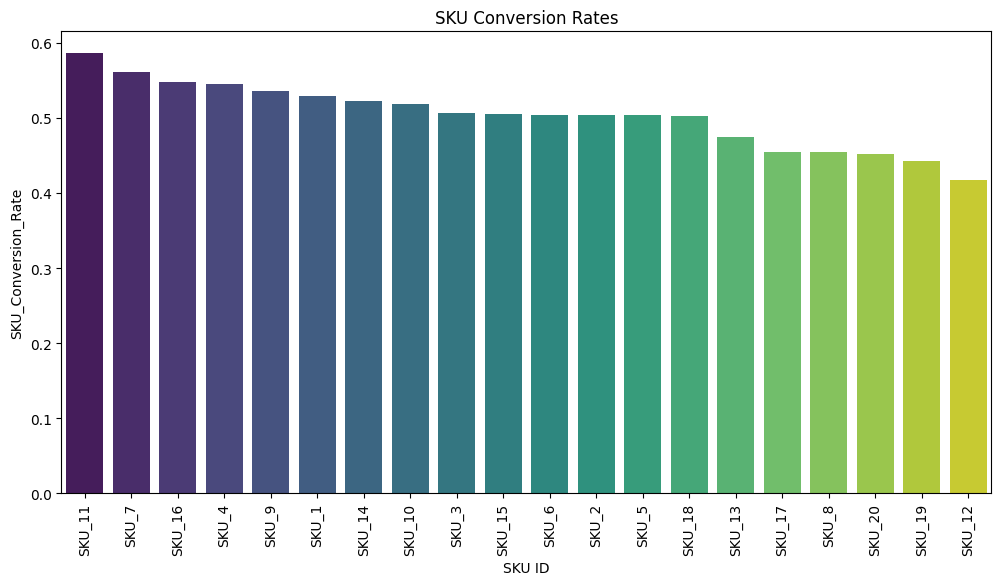

In [6]:
sku_level = df.groupby('SKU ID').agg({
    'Total Visits': 'sum',
    'Transactions': 'sum',
    'Revenue': 'sum'
}).reset_index()

sku_level['SKU_Conversion_Rate'] = sku_level['Transactions'] / sku_level['Total Visits']

sku_level_sorted = sku_level.sort_values('SKU_Conversion_Rate', ascending=False)


print("Top 5 Performing SKUs:")
print(sku_level_sorted.head(5))
print("\nBottom 5 Performing SKUs:")
print(sku_level_sorted.tail(5))


plt.figure(figsize=(12,6))
sns.barplot(x='SKU ID', y='SKU_Conversion_Rate',
            data=sku_level_sorted, palette='viridis')
plt.xticks(rotation=90)
plt.title('SKU Conversion Rates')
plt.show()

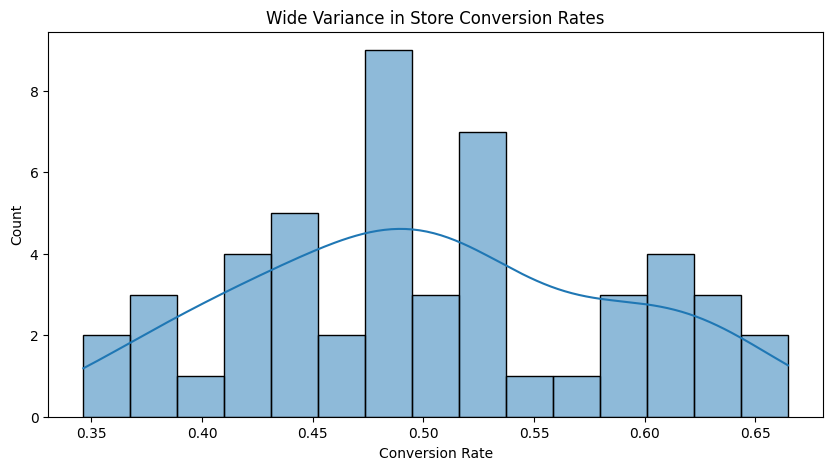

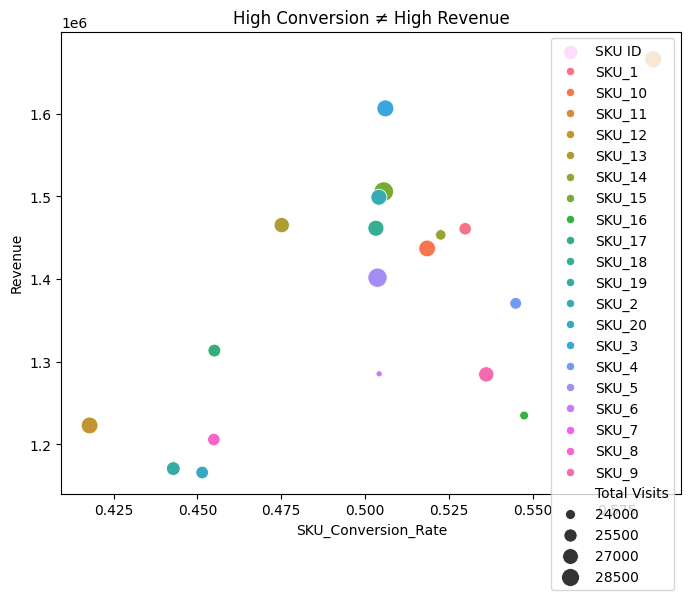

In [7]:
# Trend 1: Store performance distribution
plt.figure(figsize=(10,5))
sns.histplot(store_level['Store_Conversion_Rate'], bins=15, kde=True)
plt.title('Wide Variance in Store Conversion Rates')
plt.xlabel('Conversion Rate')
plt.show()

# Trend 2: Conversion vs. Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(data=sku_level, x='SKU_Conversion_Rate', y='Revenue', hue='SKU ID',
                size='Total Visits', sizes=(20, 200))
plt.title('High Conversion ≠ High Revenue')
plt.show()

Correlation between visits and conversion

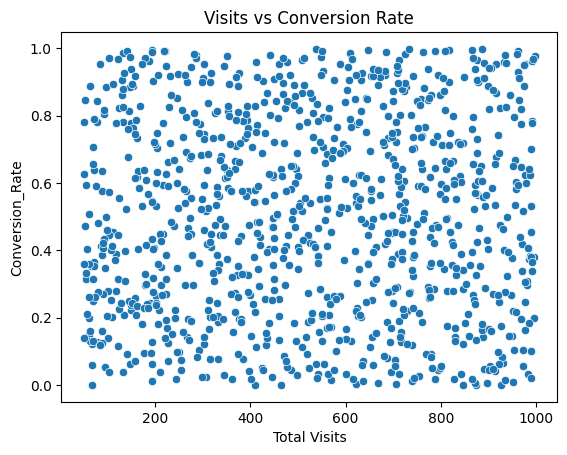

In [9]:
sns.scatterplot(x='Total Visits', y='Conversion_Rate', data=df)
plt.title('Visits vs Conversion Rate')
plt.show()

Revenue vs Conversion

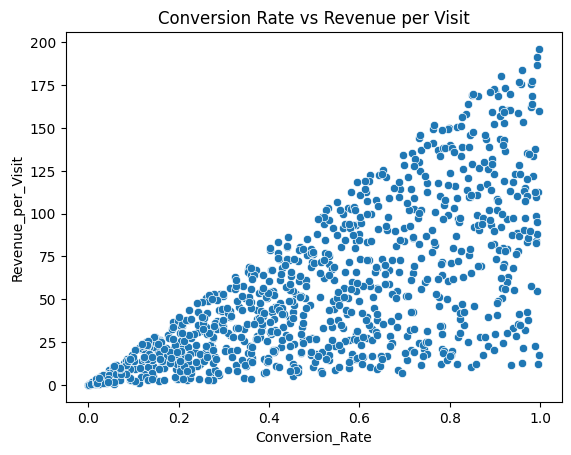

In [10]:
df['Revenue_per_Visit'] = df['Revenue'] / df['Total Visits']
sns.scatterplot(x='Conversion_Rate', y='Revenue_per_Visit', data=df)
plt.title('Conversion Rate vs Revenue per Visit')
plt.show()